In [8]:
#Librarys: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from qutip import *
import latex
from cycler import cycler
import time

import matplotlib.pyplot as plt 
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": "15",
    "font.serif": ["Times New Roman"]})
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('legend', fontsize=12) 
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from palettable.colorbrewer.qualitative import Set1_5

In [9]:
#Input data ([0] - time/coupling, [1-10] - Pn, [11] - n, [12] - g20)

#continue
##jc2
M1 = np.loadtxt('Pn_n_g20_ep1_gamma05_SS.csv', delimiter=',')
M2 = np.loadtxt('Pn_n_g20_ep1_gamma05_ME.csv', delimiter=',')
M3 = np.loadtxt('Pn_n_g20_ep1_ME.csv', delimiter=',')
M4 = np.loadtxt('Pn_n_g20_ep8_ME.csv', delimiter=',')

O1 = np.loadtxt('Pn_n_g20_g5_ep1_ME.csv', delimiter=',')
O2 = np.loadtxt('Pn_n_g20_g10_ep8_ME.csv', delimiter=',')

N1 = np.loadtxt('Pn_n_g20_ep1_SS.csv', delimiter=',')
N2 = np.loadtxt('Pn_n_g20_ep8_SS.csv', delimiter=',')

L1 = np.loadtxt('P12_n_g20_ep1_g5_MC_emission.csv', delimiter=',')
L2 = np.loadtxt('P12_n_g20_ep8_g10_MC_emission.csv', delimiter=',')
L3 = np.loadtxt('P12_n_g20_ep05_g10_MC_emission.csv', delimiter=',')

##j1
Q1 = np.loadtxt('Pn_n_g20_g10_ep8_ME_jc1.csv', delimiter=',')

#pulse
##j2
J1 = np.loadtxt('Pn_n_g20_ep1_g10_pulse.csv', delimiter=',')
J2 = np.loadtxt('Pn_n_g20_ep8_g10_pulse.csv', delimiter=',')

P1 = np.loadtxt('n_ep1_g10_pulse_emission.csv', delimiter=',')
P2 = np.loadtxt('n_ep8_g10_pulse_emission.csv', delimiter=',')

##j1
R1 = np.loadtxt('n_ep8_g10_pulse_jc1.csv', delimiter=',')
R2 = np.loadtxt('Pn_n_g20_g10_ep05_emission_jc1.csv', delimiter=',')

In [7]:
O2[:,14]

array([       nan, 1.90072617, 1.17231521, ..., 0.08778977, 0.08779079,
       0.08779113])

/tmp/ipykernel_5228/2097079755.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('Pn_n_g20_ep1.png', format='png', dpi=600)
/home/lucasribeiro/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


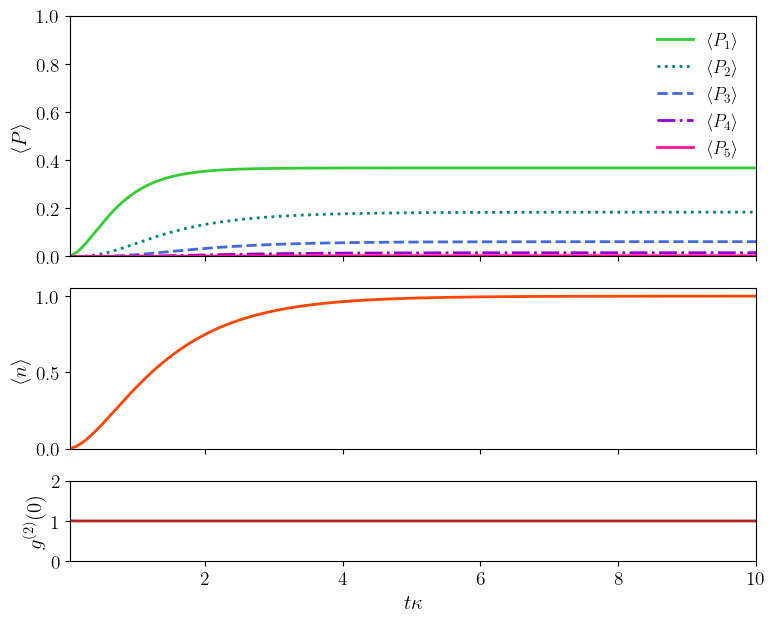

In [26]:
#Plot: projections, mean number and correlation function - ME (TCC2) - ep=1.0
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),tight_layout=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),
                                    gridspec_kw={'width_ratios': [1],'height_ratios': [12, 8, 4],
                       'wspace': 0.4,
                       'hspace': 0.2},tight_layout=True)

ax1.plot(M3[:,0], M3[:,2],color='limegreen',linestyle='solid',lw=2)
ax1.plot(M3[:,0], M3[:,3],color='teal',linestyle='dotted',lw=2)
ax1.plot(M3[:,0], M3[:,4],color='royalblue',linestyle='dashed',lw=2)
ax1.plot(M3[:,0], M3[:,5],color='darkviolet',linestyle='dashdot',lw=2)
ax1.plot(M3[:,0], M3[:,6],color='deeppink',linestyle='solid',lw=2)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle P_{3} \rangle$',r'$\langle P_{4} \rangle$',r'$\langle P_{5} \rangle$'],frameon=False,loc=1)
ax1.set_xlabel(r'$t \kappa$')
ax1.label_outer()


ax2.plot(M3[:,0], M3[:,12] ,color='orangered',linestyle='solid',lw=2)
#ax2.legend([r'Função de correlação normalizada de segunda ordem $g^{(2)}{(0)}$',r'Número médio de fótons $\langle n \rangle$'],frameon=False,loc=1)
ax2.set_ylabel(r'$\langle n \rangle$')
ax2.set_ylim([0.0,1.05*max(M3[:,12])])
#ax2.set_yticks([0.0,0.5,1.0])
#ax2.set_xlim([0.05,10.0])
ax2.set_xlabel(r'$t \kappa$')
ax2.label_outer()

ax3.plot(M3[:,0], M3[:,13],color='firebrick',linestyle='solid',lw=2)
ax3.set_xlabel(r'$t \kappa$')
ax3.set_ylabel(r'$g^{(2)}(0)$')
#ax3.set_ylim([0.0,1.2*max(M2[:,12])])
ax3.set_xlim([0.05,10.0])
ax3.set_yticks([0.0,1.0,2.0])
ax3.legend([],frameon=False,loc=2)
ax3.set_xlabel(r'$t \kappa$')
#ax3.label_outer()

#plt.suptitle(r'Jaynes-Cummings de 2 fótons: projeções e número médio de fótons com $\varepsilon=\sqrt{1.0}\cdot\kappa$ e $\gamma = 0.5\cdot\kappa$', fontsize=15)
fig.savefig('Pn_n_g20_ep1.png', format='png', dpi=600)
plt.show()

/tmp/ipykernel_9652/2804016619.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('Pn_n_g20_ep8.png', format='png', dpi=1200)
/home/lucasribeiro/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


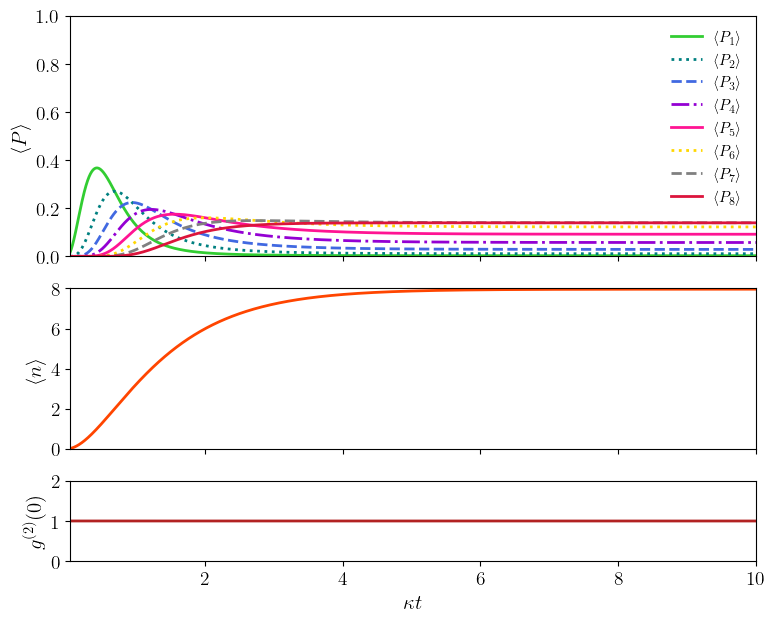

In [7]:
#Plot: projections, mean number and correlation function - ME (TCC2) - ep=8.0
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),tight_layout=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),
                                    gridspec_kw={'width_ratios': [1],'height_ratios': [12, 8, 4],
                       'wspace': 0.4,
                       'hspace': 0.2},tight_layout=True)

ax1.plot(M4[:,0], M4[:,2],color='limegreen',linestyle='solid',lw=2)
ax1.plot(M4[:,0], M4[:,3],color='teal',linestyle='dotted',lw=2)
ax1.plot(M4[:,0], M4[:,4],color='royalblue',linestyle='dashed',lw=2)
ax1.plot(M4[:,0], M4[:,5],color='darkviolet',linestyle='dashdot',lw=2)
ax1.plot(M4[:,0], M4[:,6],color='deeppink',linestyle='solid',lw=2)
ax1.plot(M4[:,0], M4[:,7],color='gold',linestyle='dotted',lw=2)
ax1.plot(M4[:,0], M4[:,8],color='gray',linestyle='dashed',lw=2)
ax1.plot(M4[:,0], M4[:,9],color='crimson',linestyle='solid',lw=2)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle P_{3} \rangle$',r'$\langle P_{4} \rangle$',r'$\langle P_{5} \rangle$',
           r'$\langle P_{6} \rangle$',r'$\langle P_{7} \rangle$',r'$\langle P_{8} \rangle$'],frameon=False,loc=1)
ax1.set_xlabel(r'$t \kappa$')
ax1.label_outer()


ax2.plot(M4[:,0], M4[:,12] ,color='orangered',linestyle='solid',lw=2)
#ax2.legend([r'Função de correlação normalizada de segunda ordem $g^{(2)}{(0)}$',r'Número médio de fótons $\langle n \rangle$'],frameon=False,loc=1)
ax2.set_ylabel(r'$\langle n \rangle$')
ax2.set_ylim([0.0,8.0])
#ax2.set_yticks([0.0,0.5,1.0])
#ax2.set_xlim([0.05,10.0])
ax2.set_xlabel(r'$t \kappa$')
ax2.label_outer()

ax3.plot(M4[:,0], M4[:,13],color='firebrick',linestyle='solid',lw=2)
ax3.set_xlabel(r'$t \kappa$')
ax3.set_ylabel(r'$g^{(2)}(0)$')
#ax3.set_ylim([0.0,1.2*max(M2[:,12])])
ax3.set_xlim([0.05,10.0])
ax3.set_yticks([0.0,1.0,2.0])
ax3.legend([],frameon=False,loc=2)
ax3.set_xlabel(r'$\kappa t $')
#ax3.label_outer()

#plt.suptitle(r'Jaynes-Cummings de 2 fótons: projeções e número médio de fótons com $\varepsilon=\sqrt{1.0}\cdot\kappa$ e $\gamma = 0.5\cdot\kappa$', fontsize=15)
fig.savefig('Pn_n_g20_ep8.png', format='png', dpi=1200)
plt.show()

/tmp/ipykernel_29369/926431964.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('Pn_n_g20_ep1_jc1.png', format='png', dpi=600)
/home/lucasribeiro/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


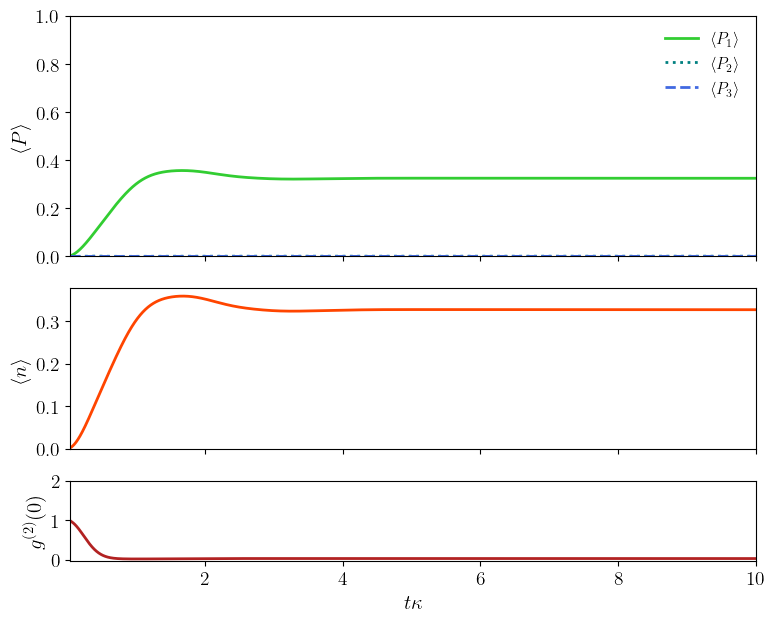

In [3]:
#Plot: dynamics projections, mean number and correlation function - ME (TCC2) - ep=1.0
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),tight_layout=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),
                                    gridspec_kw={'width_ratios': [1],'height_ratios': [12, 8, 4],
                       'wspace': 0.4,
                       'hspace': 0.2},tight_layout=True)

ax1.plot(O1[:,0], O1[:,2],color='limegreen',linestyle='solid',lw=2)
ax1.plot(O1[:,0], O1[:,3],color='teal',linestyle='dotted',lw=2)
ax1.plot(O1[:,0], O1[:,4],color='royalblue',linestyle='dashed',lw=2)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle P_{3} \rangle$',r'$\langle P_{4} \rangle$',r'$\langle P_{5} \rangle$'],frameon=False,loc=1)
ax1.set_xlabel(r'$t \kappa$')
ax1.label_outer()


ax2.plot(O1[:,0], O1[:,12] ,color='orangered',linestyle='solid',lw=2)
#ax2.legend([r'Função de correlação normalizada de segunda ordem $g^{(2)}{(0)}$',r'Número médio de fótons $\langle n \rangle$'],frameon=False,loc=1)
ax2.set_ylabel(r'$\langle n \rangle$')
ax2.set_ylim([0.0,1.05*max(O1[:,12])])
#ax2.set_yticks([0.0,0.5,1.0])
#ax2.set_xlim([0.05,10.0])
ax2.set_xlabel(r'$t \kappa$')
ax2.label_outer()

ax3.plot(O1[:,0], O1[:,13],color='firebrick',linestyle='solid',lw=2)
ax3.set_xlabel(r'$t \kappa$')
ax3.set_ylabel(r'$g^{(2)}(0)$')
#ax3.set_ylim([0.0,1.2*max(M2[:,12])])
ax3.set_xlim([0.05,10.0])
ax3.set_yticks([0.0,1.0,2.0])
ax3.legend([],frameon=False,loc=2)
ax3.set_xlabel(r'$t \kappa$')
#ax3.label_outer()

#plt.suptitle(r'Jaynes-Cummings de 2 fótons: projeções e número médio de fótons com $\varepsilon=\sqrt{1.0}\cdot\kappa$ e $\gamma = 0.5\cdot\kappa$', fontsize=15)
fig.savefig('Pn_n_g20_ep1_jc1.png', format='png', dpi=600)
plt.show()

/tmp/ipykernel_25064/2082084029.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('Pn_n_g20_ep8_jc1.png', format='png', dpi=1200)


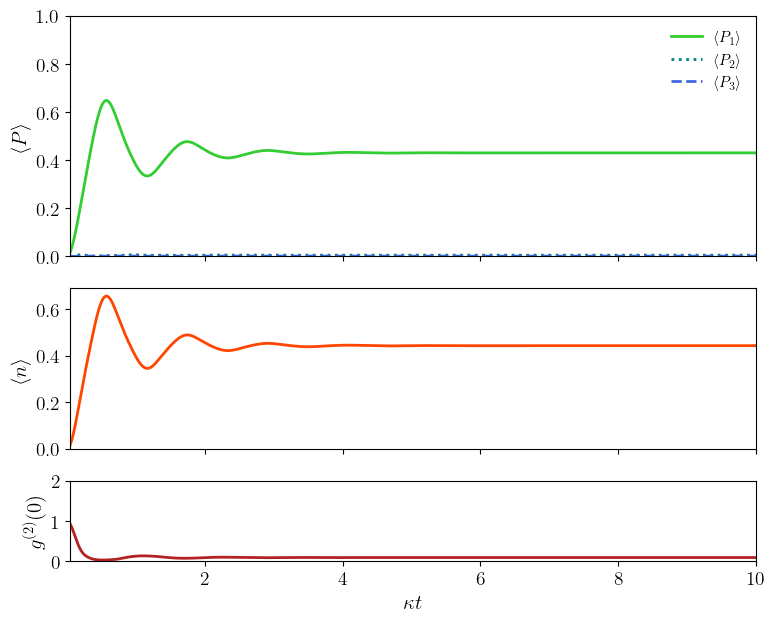

In [10]:
#Plot: dynamics projections, mean number and correlation function - ME (TCC2) - ep=1.0
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),tight_layout=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),
                                    gridspec_kw={'width_ratios': [1],'height_ratios': [12, 8, 4],
                       'wspace': 0.4,
                       'hspace': 0.2},tight_layout=True)

ax1.plot(O2[:,0], O2[:,2],color='limegreen',linestyle='solid',lw=2)
ax1.plot(O2[:,0], O2[:,3],color='teal',linestyle='dotted',lw=2)
ax1.plot(O2[:,0], O2[:,4],color='royalblue',linestyle='dashed',lw=2)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle P_{3} \rangle$',r'$\langle P_{4} \rangle$',r'$\langle P_{5} \rangle$'],frameon=False,loc=1)
ax1.set_xlabel(r'$t \kappa$')
ax1.label_outer()


ax2.plot(O2[:,0], O2[:,12] ,color='orangered',linestyle='solid',lw=2)
#ax2.legend([r'Função de correlação normalizada de segunda ordem $g^{(2)}{(0)}$',r'Número médio de fótons $\langle n \rangle$'],frameon=False,loc=1)
ax2.set_ylabel(r'$\langle n \rangle$')
ax2.set_ylim([0.0,1.05*max(O2[:,12])])
#ax2.set_yticks([0.0,0.5,1.0])
#ax2.set_xlim([0.05,10.0])
ax2.set_xlabel(r'$t \kappa$')
ax2.label_outer()

ax3.plot(O2[:,0], O2[:,14],color='firebrick',linestyle='solid',lw=2)
ax3.set_xlabel(r'$t \kappa$')
ax3.set_ylabel(r'$g^{(2)}(0)$')
#ax3.set_ylim([0.0,1.2*max(M2[:,12])])
ax3.set_xlim([0.05,10.0])
ax3.set_ylim([0.0,2.0])
#ax3.set_yticks([0.0,1.0,2.0])
ax3.legend([],frameon=False,loc=2)
ax3.set_xlabel(r'$\kappa t$')
#ax3.label_outer()

#plt.suptitle(r'Jaynes-Cummings de 2 fótons: projeções e número médio de fótons com $\varepsilon=\sqrt{1.0}\cdot\kappa$ e $\gamma = 0.5\cdot\kappa$', fontsize=15)
fig.savefig('Pn_n_g20_ep8_jc1.png', format='png', dpi=1200)
plt.show()

/tmp/ipykernel_9652/3110405408.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('Pn_n_g20_g10_ep8_comparejc12.png', format='png', dpi=1200)


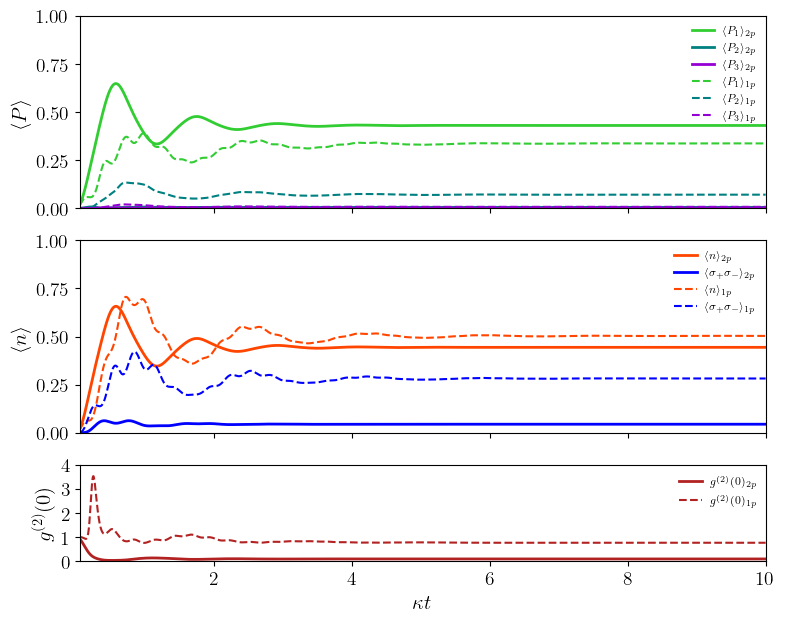

In [17]:
#Plot: dynamics projections (JC1), mean number and correlation function - ME (TCC2) - ep=1.0
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),tight_layout=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [12, 12, 6],
                       'wspace': 0.4,
                       'hspace': 0.2},tight_layout=True)

#j2
ax1.plot(O2[:,0], O2[:,2],color='limegreen',linestyle='solid',lw=2)
ax1.plot(O2[:,0], O2[:,3],color='teal',linestyle='solid',lw=2)
ax1.plot(O2[:,0], O2[:,4],color='darkviolet',linestyle='solid',lw=2)
#j1
ax1.plot(Q1[:,0], Q1[:,2],color='limegreen',linestyle='dashed',lw=1.5)
ax1.plot(Q1[:,0], Q1[:,3],color='teal',linestyle='dashed',lw=1.5)
ax1.plot(Q1[:,0], Q1[:,4],color='darkviolet',linestyle='dashed',lw=1.5)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle_{2p}$',r'$\langle P_{2} \rangle_{2p}$',r'$\langle P_{3} \rangle_{2p}$',
            r'$\langle P_{1} \rangle_{1p}$',r'$\langle P_{2} \rangle_{1p}$',r'$\langle P_{3} \rangle_{1p}$'],frameon=False,loc=1)
ax1.set_xlabel(r'$t \kappa$')
ax1.label_outer()

#jc2
ax2.plot(O2[:,0], O2[:,12] ,color='orangered',linestyle='solid',lw=2)
ax2.plot(O2[:,0], O2[:,13] ,color='blue',linestyle='solid',lw=2)
#jc1
ax2.plot(Q1[:,0], Q1[:,12] ,color='orangered',linestyle='dashed',lw=1.5)
ax2.plot(Q1[:,0], Q1[:,13] ,color='blue',linestyle='dashed',lw=1.5)
ax2.legend([r'$\langle n \rangle_{2p}$',r'$\langle \sigma_+ \sigma_- \rangle_{2p}$',
           r'$\langle n \rangle_{1p}$',r'$\langle \sigma_+ \sigma_- \rangle_{1p}$'],frameon=False,loc=1)
ax2.set_ylabel(r'$\langle n \rangle$')
ax2.set_ylim([0.0,1.0])
#ax2.set_yticks([0.0,0.5,1.0])
#ax2.set_xlim([0.05,10.0])
ax2.set_xlabel(r'$t \kappa$')
ax2.label_outer()

#jc2
ax3.plot(O2[:,0], O2[:,14],color='firebrick',linestyle='solid',lw=2)
#jc1
ax3.plot(Q1[:,0], Q1[:,14],color='firebrick',linestyle='dashed',lw=1.5)
ax3.set_xlabel(r'$t \kappa$')
ax3.set_ylabel(r'$g^{(2)}(0)$')
#ax3.set_ylim([0.0,1.2*max(M2[:,12])])
ax3.set_xlim([0.05,10.0])
ax3.set_ylim([0.0,4])
ax3.set_yticks([0.0,1.0,2.0,3.0,4.0])
ax3.legend([r'$g^{(2)}(0)_{2p}$',r'$g^{(2)}(0)_{1p}$'],frameon=False,loc=1)
ax3.set_xlabel(r'$\kappa t$')
#ax3.label_outer()

#plt.suptitle(r'Jaynes-Cummings de 2 fótons: projeções e número médio de fótons com $\varepsilon=\sqrt{1.0}\cdot\kappa$ e $\gamma = 0.5\cdot\kappa$', fontsize=15)
fig.savefig('Pn_n_g20_g10_ep8_comparejc12.png', format='png', dpi=1200)
plt.show()

/tmp/ipykernel_9652/1545535567.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('Pn_n_g10_ep05_comparejc12emissioncontinue.png', format='png', dpi=1200)
/home/lucasribeiro/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


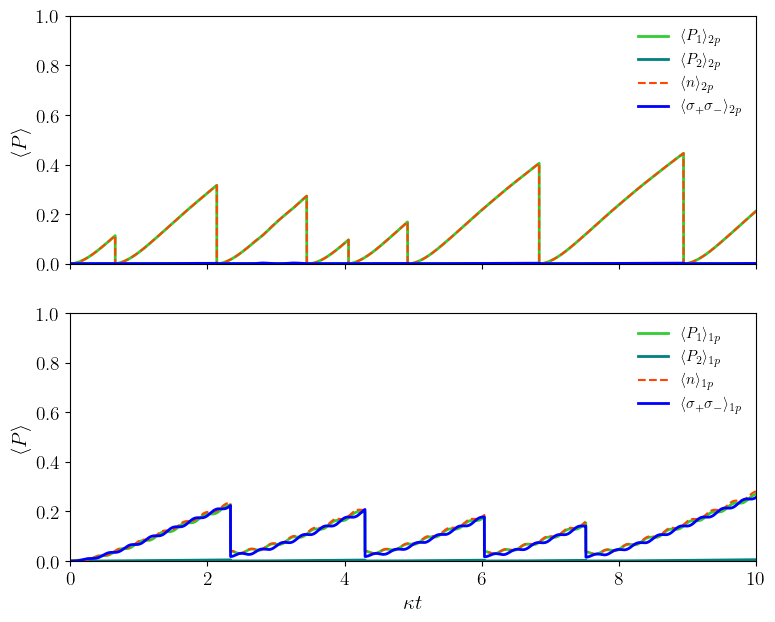

In [21]:
#Plot: Compare emission continue (JC1 and JC2)(TCC2) - ep=0.5 g=10
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),tight_layout=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),
                                        gridspec_kw={'width_ratios': [1],'height_ratios': [12, 12],
                       'wspace': 0.4,
                       'hspace': 0.2},tight_layout=True)

#j2
ax1.plot(L3[:,0], L3[:,1],color='limegreen',linestyle='solid',lw=2)
ax1.plot(L3[:,0], L3[:,2],color='teal',linestyle='solid',lw=2)
ax1.plot(L3[:,0], L3[:,3],color='orangered',linestyle='--',lw=1.5)
ax1.plot(L3[:,0], L3[:,4],color='blue',linestyle='solid',lw=2)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle_{2p}$',r'$\langle P_{2} \rangle_{2p}$',r'$\langle n \rangle_{2p}$',r'$\langle \sigma_+ \sigma_- \rangle_{2p}$',],frameon=False,loc=1)
ax1.set_xlabel(r'$t \kappa$')
ax1.label_outer()

#j1
ax2.plot(R2[:,0], R2[:,1],color='limegreen',linestyle='solid',lw=2.0)
ax2.plot(R2[:,0], R2[:,2],color='teal',linestyle='solid',lw=2.0)
ax2.plot(R2[:,0], R2[:,3],color='orangered',linestyle='--',lw=1.5)
ax2.plot(R2[:,0], R2[:,4],color='blue',linestyle='solid',lw=2.0)
ax2.legend([r'$\langle P_{1} \rangle_{1p}$',r'$\langle P_{2} \rangle_{1p}$',r'$\langle n \rangle_{1p}$',r'$\langle \sigma_+ \sigma_- \rangle_{1p}$'],frameon=False,loc=1)
ax2.set_ylabel(r'$\langle P \rangle$')
ax2.set_ylim([0.0,1.0])
#ax2.set_yticks([0.0,0.5,1.0])
#ax2.set_xlim([0.05,10.0])
ax2.set_xlabel(r'$ \kappa t$')
ax2.label_outer()


#plt.suptitle(r'Jaynes-Cummings de 2 fótons: projeções e número médio de fótons com $\varepsilon=\sqrt{1.0}\cdot\kappa$ e $\gamma = 0.5\cdot\kappa$', fontsize=15)
fig.savefig('Pn_n_g10_ep05_comparejc12emissioncontinue.png', format='png', dpi=1200)
plt.show()

/tmp/ipykernel_5228/2338746498.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('Pn_n_g20_ep1_SS.png', format='png', dpi=600)
/home/lucasribeiro/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


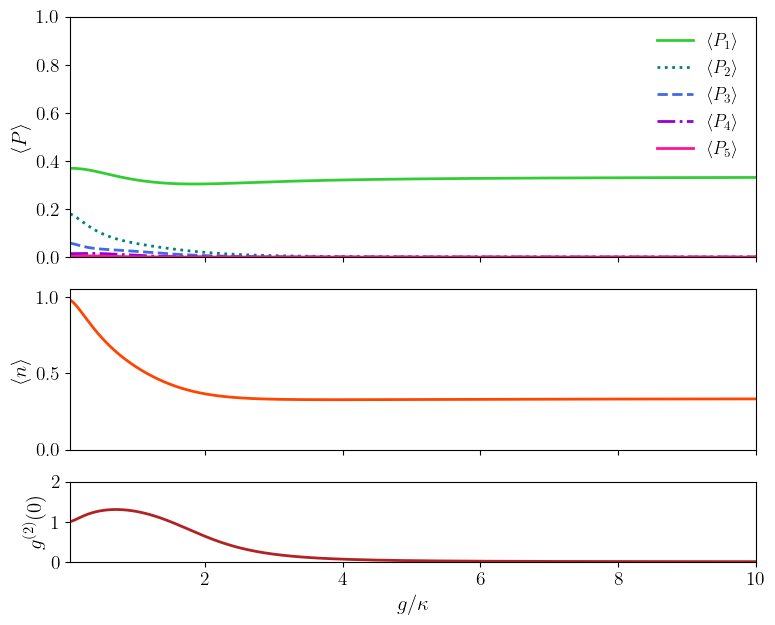

In [28]:
#Plot: projections, mean number and correlation function - SS (TCC2) - ep=1.0
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),tight_layout=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),
                                    gridspec_kw={'width_ratios': [1],'height_ratios': [12, 8, 4],
                       'wspace': 0.4,
                       'hspace': 0.2},tight_layout=True)

ax1.plot(N1[:,0], N1[:,1],color='limegreen',linestyle='solid',lw=2)
ax1.plot(N1[:,0], N1[:,2],color='teal',linestyle='dotted',lw=2)
ax1.plot(N1[:,0], N1[:,3],color='royalblue',linestyle='dashed',lw=2)
ax1.plot(N1[:,0], N1[:,4],color='darkviolet',linestyle='dashdot',lw=2)
ax1.plot(N1[:,0], N1[:,5],color='deeppink',linestyle='solid',lw=2)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle P_{3} \rangle$',r'$\langle P_{4} \rangle$',r'$\langle P_{5} \rangle$'],frameon=False,loc=1)
ax1.set_xlabel(r'$t \kappa$')
ax1.label_outer()


ax2.plot(N1[:,0], N1[:,11] ,color='orangered',linestyle='solid',lw=2)
#ax2.legend([r'Função de correlação normalizada de segunda ordem $g^{(2)}{(0)}$',r'Número médio de fótons $\langle n \rangle$'],frameon=False,loc=1)
ax2.set_ylabel(r'$\langle n \rangle$')
#ax2.set_ylim([0.0,1.05*max(N1[:,12])])
#ax2.set_yticks([0.0,0.5,1.0])
ax2.set_ylim([0.0,1.0*1.05])
ax2.set_xlabel(r'$t \kappa$')
ax2.label_outer()

ax3.plot(N1[:,0], N1[:,12],color='firebrick',linestyle='solid',lw=2)
ax3.set_xlabel(r'$g / \kappa$')
ax3.set_ylabel(r'$g^{(2)}(0)$')
#ax3.set_ylim([0.0,1.2*max(M2[:,12])])
ax3.set_xlim([0.05,10.0])
ax3.set_ylim([0,2])
ax3.set_yticks([0.0,1.0,2.0])
ax3.legend([],frameon=False,loc=2)
#ax3.label_outer()

#plt.suptitle(r'Jaynes-Cummings de 2 fótons: projeções e número médio de fótons com $\varepsilon=\sqrt{1.0}\cdot\kappa$ e $\gamma = 0.5\cdot\kappa$', fontsize=15)
fig.savefig('Pn_n_g20_ep1_SS.png', format='png', dpi=600)
plt.show()

/tmp/ipykernel_5228/1695652624.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('Pn_n_g20_ep8_SS.png', format='png', dpi=600)


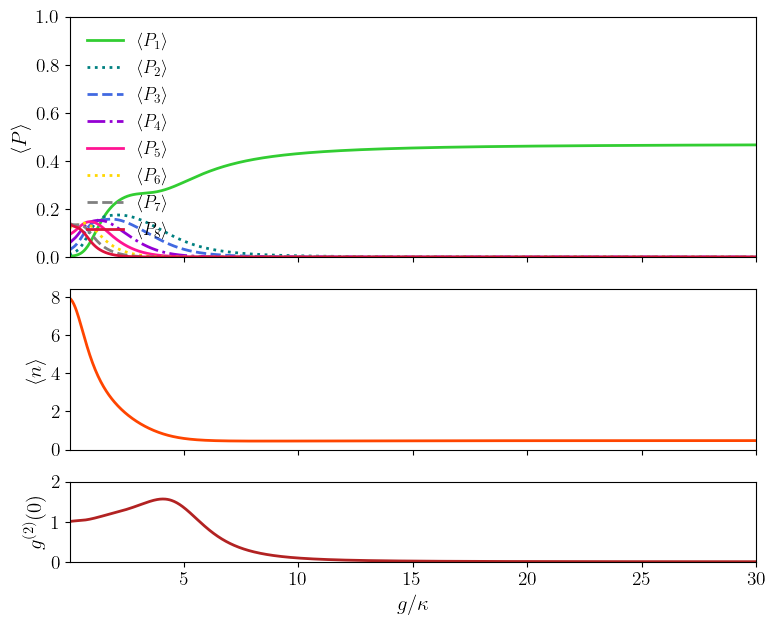

In [29]:
#Plot: projections, mean number and correlation function - SS (TCC2) - ep=8.0
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),tight_layout=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(2.5*3.54,2.0*3.54),
                                    gridspec_kw={'width_ratios': [1],'height_ratios': [12, 8, 4],
                       'wspace': 0.4,
                       'hspace': 0.2},tight_layout=True)

ax1.plot(N2[:,0], N2[:,1],color='limegreen',linestyle='solid',lw=2)
ax1.plot(N2[:,0], N2[:,2],color='teal',linestyle='dotted',lw=2)
ax1.plot(N2[:,0], N2[:,3],color='royalblue',linestyle='dashed',lw=2)
ax1.plot(N2[:,0], N2[:,4],color='darkviolet',linestyle='dashdot',lw=2)
ax1.plot(N2[:,0], N2[:,5],color='deeppink',linestyle='solid',lw=2)
ax1.plot(N2[:,0], N2[:,6],color='gold',linestyle='dotted',lw=2)
ax1.plot(N2[:,0], N2[:,7],color='gray',linestyle='dashed',lw=2)
ax1.plot(N2[:,0], N2[:,8],color='crimson',linestyle='solid',lw=2)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle P_{3} \rangle$',r'$\langle P_{4} \rangle$',r'$\langle P_{5} \rangle$',
           r'$\langle P_{6} \rangle$',r'$\langle P_{7} \rangle$',r'$\langle P_{8} \rangle$'],frameon=False,loc=2)
ax1.set_xlabel(r'$t \kappa$')
ax1.label_outer()


ax2.plot(N2[:,0], N2[:,11] ,color='orangered',linestyle='solid',lw=2)
#ax2.legend([r'Função de correlação normalizada de segunda ordem $g^{(2)}{(0)}$',r'Número médio de fótons $\langle n \rangle$'],frameon=False,loc=1)
ax2.set_ylabel(r'$\langle n \rangle$')
#ax2.set_ylim([0.0,1.05*max(N1[:,12])])
ax2.set_yticks([0.0,2.0,4.0,6.0,8.0])
ax2.set_ylim([0.0,8.0*1.05])
ax2.set_xlabel(r'$t \kappa$')
ax2.label_outer()

ax3.plot(N2[:,0], N2[:,12],color='firebrick',linestyle='solid',lw=2)
ax3.set_xlabel(r'$g / \kappa$')
ax3.set_ylabel(r'$g^{(2)}(0)$')
#ax3.set_ylim([0.0,1.2*max(M2[:,12])])
ax3.set_xlim([0.05,30.0])
ax3.set_ylim([0,2])
ax3.set_yticks([0.0,1.0,2.0])
ax3.legend([],frameon=False,loc=2)
#ax3.label_outer()

#plt.suptitle(r'Jaynes-Cummings de 2 fótons: projeções e número médio de fótons com $\varepsilon=\sqrt{1.0}\cdot\kappa$ e $\gamma = 0.5\cdot\kappa$', fontsize=15)
fig.savefig('Pn_n_g20_ep8_SS.png', format='png', dpi=600)
plt.show()

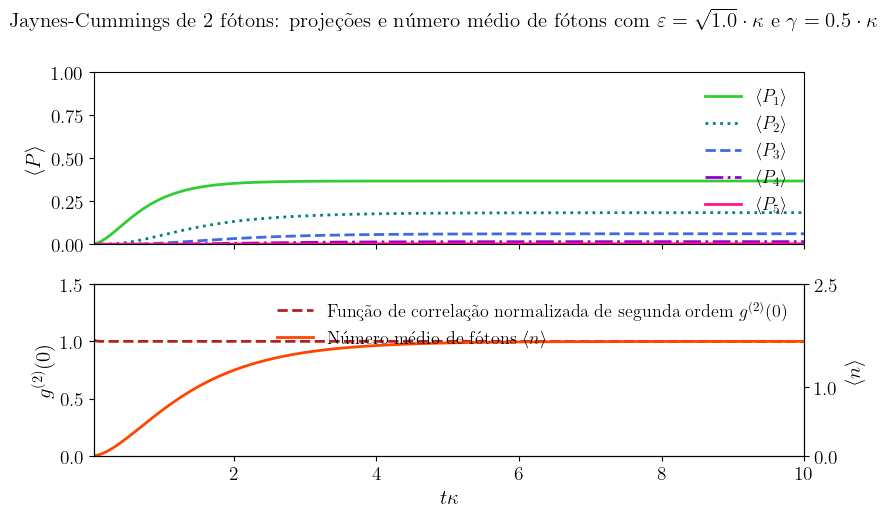

In [30]:
#Plot: projections, mean number and correlation function - ME
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(2.5*3.54,1.5*3.54),tight_layout=True)

ax1.plot(M2[:,0], M2[:,1],color='limegreen',linestyle='solid',lw=2)
ax1.plot(M2[:,0], M2[:,2],color='teal',linestyle='dotted',lw=2)
ax1.plot(M2[:,0], M2[:,3],color='royalblue',linestyle='dashed',lw=2)
ax1.plot(M2[:,0], M2[:,4],color='darkviolet',linestyle='dashdot',lw=2)
ax1.plot(M2[:,0], M2[:,5],color='deeppink',linestyle='solid',lw=2)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle P_{3} \rangle$',r'$\langle P_{4} \rangle$',r'$\langle P_{5} \rangle$'],frameon=False,loc=1)
ax1.set_xlabel(r'$t \kappa$')
ax1.label_outer()



ax2.plot(M2[:,0], M2[:,12] ,color='firebrick',linestyle='dashed',lw=2)
ax2.plot(M2[:,0], M2[:,11],color='orangered',linestyle='solid',lw=2)
ax2.legend([r'Função de correlação normalizada de segunda ordem $g^{(2)}{(0)}$',r'Número médio de fótons $\langle n \rangle$'],frameon=False,loc=1)
ax2.set_ylabel(r'$g^{(2)}(0)$')
ax2.set_ylim([0.0,1.5])
ax2.set_yticks([0.0,0.5,1.0,1.5])
ax2.set_xlim([0.05,10.0])
ax2.set_xlabel(r'$t \kappa$')
#ax2.label_outer()

ax3 = ax2.twinx()

ax3.set_xlabel(r'$t \kappa$')
ax3.set_ylabel(r'$\langle n \rangle$')
ax3.set_ylim([0.0,1.2*max(M2[:,11])])
ax3.set_yticks([0.0,2.5,max(M2[:,11])])
ax3.legend([],frameon=False,loc=2)
ax3.set_xlabel(r'$t \kappa$')
#ax3.label_outer()




plt.suptitle(r'Jaynes-Cummings de 2 fótons: projeções e número médio de fótons com $\varepsilon=\sqrt{1.0}\cdot\kappa$ e $\gamma = 0.5\cdot\kappa$', fontsize=15)
fig.savefig('Pn_n_g20_ep1_gamma05.png', format='png', dpi=600)
plt.show()

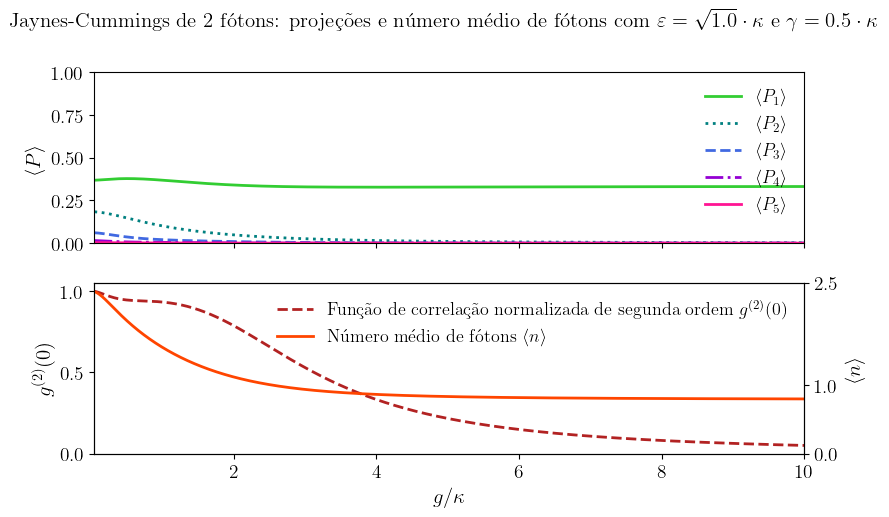

In [31]:
#Plot: projections, mean number and correlation function - SS
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(2.5*3.54,1.5*3.54),tight_layout=True)

ax1.plot(M1[:,0], M1[:,1],color='limegreen',linestyle='solid',lw=2)
ax1.plot(M1[:,0], M1[:,2],color='teal',linestyle='dotted',lw=2)
ax1.plot(M1[:,0], M1[:,3],color='royalblue',linestyle='dashed',lw=2)
ax1.plot(M1[:,0], M1[:,4],color='darkviolet',linestyle='dashdot',lw=2)
ax1.plot(M1[:,0], M1[:,5],color='deeppink',linestyle='solid',lw=2)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle P_{3} \rangle$',r'$\langle P_{4} \rangle$',r'$\langle P_{5} \rangle$'],frameon=False,loc=1)
ax1.set_xlabel(r'$g / \kappa$')
ax1.label_outer()


ax3 = ax2.twinx()
ax2.plot(M1[:,0], M1[:,12] ,color='firebrick',linestyle='dashed',lw=2)
ax2.plot(M1[:,0], M1[:,11],color='orangered',linestyle='solid',lw=2)
#ax2.legend([r'Função de correlação normalizada de segunda ordem $g^{(2)}{(0)}$'],frameon=False,loc=2)
ax2.set_ylabel(r'$g^{(2)}(0)$')
ax2.set_ylim([0.0,1.05*max(M1[:,12])])
#ax2.set_yticks([0.0,0.5,1.0,1.5])
ax2.set_xlim([0.05,10.0])
ax2.set_xlabel(r'$g / \kappa$')
#ax2.label_outer()


#ax3.plot(M1[:,0], M1[:,11],color='orangered',linestyle='solid',lw=2)
ax3.set_xlabel(r'$t \kappa$')
ax3.set_ylabel(r'$\langle n \rangle$')
ax3.set_ylim([0.0,1.2*max(M1[:,11])])
ax3.set_yticks([0.0,2.5,max(M1[:,11])])
#ax3.legend([r'Número médio de fótons $\langle n \rangle$'],frameon=False,loc=1)
ax3.set_xlabel(r'$t \kappa$')
ax2.legend([r'Função de correlação normalizada de segunda ordem $g^{(2)}{(0)}$',r'Número médio de fótons $\langle n \rangle$'],frameon=False,loc=1)
#ax3.label_outer()




plt.suptitle(r'Jaynes-Cummings de 2 fótons: projeções e número médio de fótons com $\varepsilon=\sqrt{1.0}\cdot\kappa$ e $\gamma = 0.5\cdot\kappa$', fontsize=15)
fig.savefig('Pn_n_g20_ep1_gamma05_SS.png', format='png', dpi=600)
plt.show()

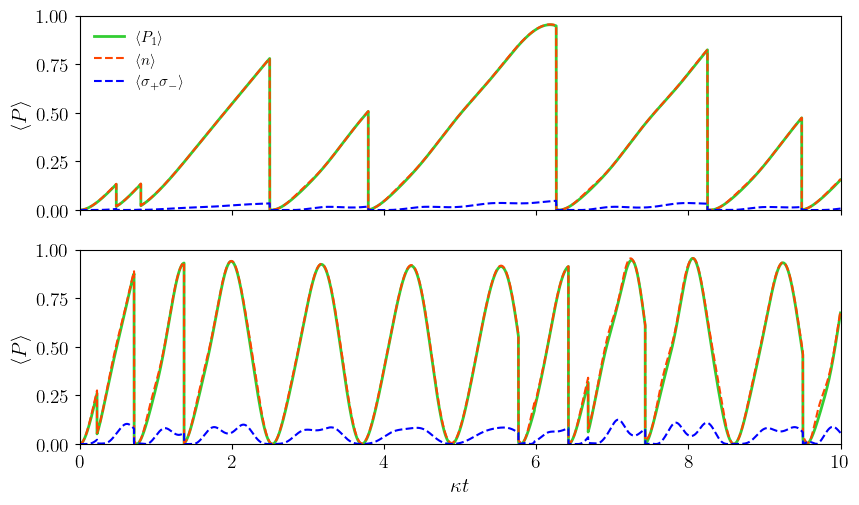

In [9]:
#Plot: emission: projections, mean number and excited - MC
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(2.5*3.54,1.5*3.54),tight_layout=True)

ax1.plot(L1[:,0], L1[:,1],color='limegreen',linestyle='solid',lw=2)
ax1.plot(L1[:,0], L1[:,3],color='orangered',linestyle='--',lw=1.5)
ax1.plot(L1[:,0], L1[:,4],color='blue',linestyle='--',lw=1.5)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,10.0])
ax1.set_ylim([0.0,1.0])
ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle n \rangle$',r'$\langle \sigma_+ \sigma_- \rangle$'],frameon=False,loc=2)
#ax1.set_xlabel(r'$t \kappa$')
#ax1.label_outer()

ax2.plot(L2[:,0], L2[:,1],color='limegreen',linestyle='solid',lw=2)
ax2.plot(L2[:,0], L2[:,3],color='orangered',linestyle='--',lw=1.5)
ax2.plot(L2[:,0], L2[:,4],color='blue',linestyle='--',lw=1.5)
ax2.set_ylabel(r'$\langle P \rangle$')
ax2.set_xlim([0,10.0])
ax2.set_ylim([0.0,1.0])
#ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle n \rangle$',r'$\sigma_+ \sigma_-$'],frameon=False,loc=1)
ax2.set_xlabel(r'$\kappa t $')
ax2.label_outer()


fig.savefig('P12_n_ep18_g510_emission_MC.png', format='png', dpi=1200)
plt.show()

/tmp/ipykernel_5228/4166966567.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('P12_n_ep18_g10_pulse.png', format='png', dpi=600)


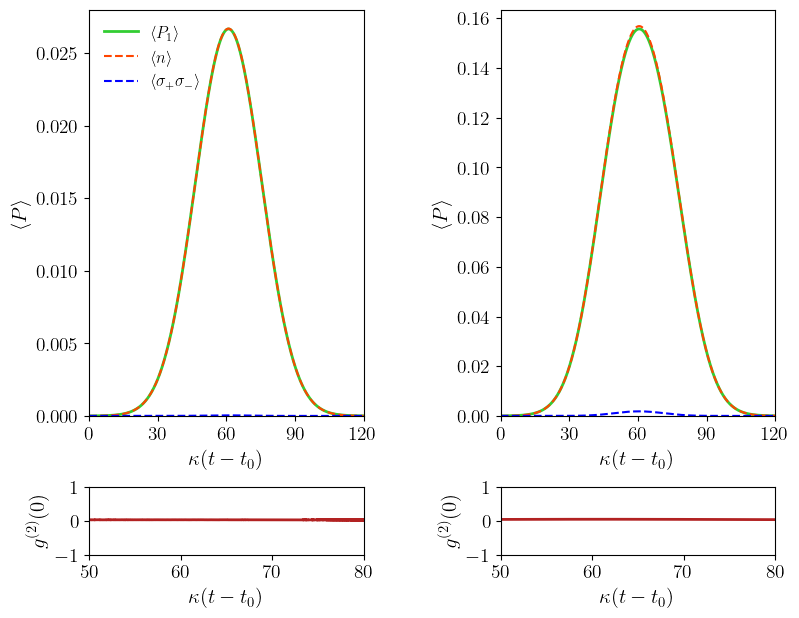

In [83]:
#Plot: projections, mean number, excited and g20 - pulse
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(2.5*3.54,2.0*3.54),
                                  gridspec_kw={'width_ratios': [10,10],'height_ratios': [6, 1],
                       'wspace': 0.5,
                       'hspace': 0.3},tight_layout=True,sharey=False,sharex=False)

ax1.plot(K1[:,0], K1[:,1],color='limegreen',linestyle='solid',lw=2)
ax1.plot(K1[:,0], K1[:,3],color='orangered',linestyle='--',lw=1.5)
ax1.plot(K1[:,0], K1[:,4],color='blue',linestyle='--',lw=1.5)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,120.0])
ax1.set_xticks([0,30,60,90,120.0])
ax1.set_ylim([0.0,1.05*max(K1[:,1])])
ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle n \rangle$',r'$\langle \sigma_+ \sigma_- \rangle$'],frameon=False,loc=2)
ax1.set_xlabel(r'$\kappa(t-t_0)$')
#ax1.label_outer()

ax2.plot(K2[:,0], K2[:,1],color='limegreen',linestyle='solid',lw=2)
ax2.plot(K2[:,0], K2[:,3],color='orangered',linestyle='--',lw=1.5)
ax2.plot(K2[:,0], K2[:,4],color='blue',linestyle='--',lw=1.5)
ax2.set_ylabel(r'$\langle P \rangle$')
ax2.set_xlim([0,120.0])
ax2.set_xticks([0,30,60,90,120.0])
ax2.set_ylim([0.0,1.05*max(K2[:,1])])
#ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle n \rangle$',r'$\sigma_+ \sigma_-$'],frameon=False,loc=1)
ax2.set_xlabel(r'$\kappa(t-t_0)$')
#ax2.label_outer()

ax3.plot(K1[:,0], K1[:,5],color='firebrick',linestyle='solid',lw=2)
ax3.set_xlabel(r'$\kappa(t-t_0)$')
ax3.set_ylabel(r'$g^{(2)}(0)$')
ax3.set_xlim([50.0,80.0])
ax3.set_ylim([-1.0,1.0])
ax3.set_yticks([-1.0,0,1.0])
ax3.set_xlabel(r'$\kappa(t-t_0)$')
#ax3.label_outer()

ax4.plot(K2[:,0], K2[:,5],color='firebrick',linestyle='solid',lw=2)
ax4.set_xlabel(r'$\kappa(t-t_0)$')
ax4.set_ylabel(r'$g^{(2)}(0)$')
ax4.set_xlim([50.0,80.0])
ax4.set_ylim([-1.0,1.0])
ax4.set_yticks([-1.0,0,1.0])
ax4.set_xlabel(r'$\kappa(t-t_0)$')
#ax4.label_outer()


fig.savefig('P12_n_ep18_g10_pulse.png', format='png', dpi=600)
plt.show()

/tmp/ipykernel_4603/3827730041.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('n_ep18_g10_pulse_emission.png', format='png', dpi=600)
/home/lucasribeiro/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


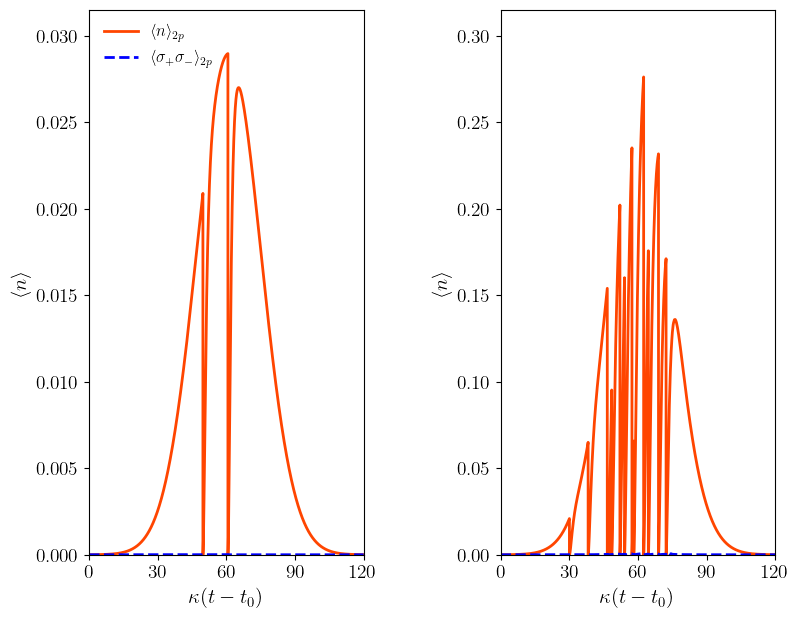

In [10]:
#Plot: emisson - mean number and excited - pulse
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(2.5*3.54,2.0*3.54),
                                  gridspec_kw={'width_ratios': [2,2],'height_ratios': [1],
                       'wspace': 0.5,
                       'hspace': 0.3},tight_layout=True,sharey=False,sharex=False)

ax1.plot(P1[:,0], P1[:,1],color='orangered',linestyle='solid',lw=2)
ax1.plot(P1[:,0], P1[:,2],color='blue',linestyle='--',lw=2.0)
ax1.set_ylabel(r'$\langle n \rangle$')
ax1.set_xlim([0,120.0])
ax1.set_xticks([0,30,60,90,120.0])
ax1.set_ylim([0.0,1.05*0.03])
ax1.legend([r'$\langle n \rangle_{2p}$',r'$\langle \sigma_+ \sigma_- \rangle_{2p}$'],frameon=False,loc=2)
ax1.set_xlabel(r'$\kappa(t-t_0)$')
#ax1.label_outer()

ax2.plot(P2[:,0], P2[:,1],color='orangered',linestyle='solid',lw=2)
ax2.plot(P2[:,0], P2[:,2],color='blue',linestyle='--',lw=2.0)
ax2.set_ylabel(r'$\langle n \rangle$')
ax2.set_xlim([0,120.0])
ax2.set_xticks([0,30,60,90,120.0])
ax2.set_yticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax2.set_ylim([0.0,1.05*0.3])
#ax1.legend([r'$\langle P_{1} \rangle$',r'$\langle P_{2} \rangle$',r'$\langle n \rangle$',r'$\sigma_+ \sigma_-$'],frameon=False,loc=1)
ax2.set_xlabel(r'$\kappa(t-t_0)$')
#ax2.label_outer()


fig.savefig('n_ep18_g10_pulse_emission.png', format='png', dpi=600)
plt.show()

/tmp/ipykernel_8460/2590907110.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('P12_n_ep8_g10_pulse_compare.png', format='png', dpi=600)
/home/lucasribeiro/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


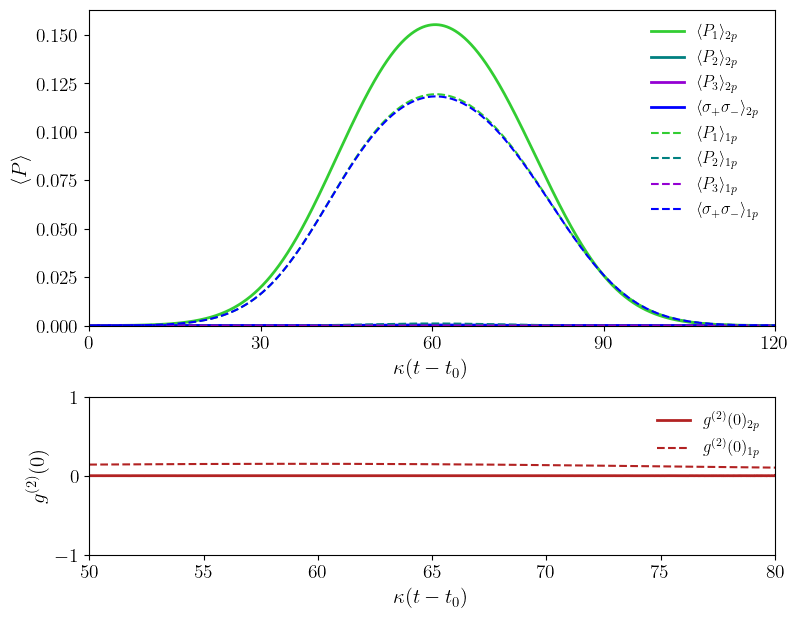

In [9]:
#Plot: compare jc1 and jc2 -> projections, mean number, excited and g20 - pulse
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(2.5*3.54,2.0*3.54),
                                  gridspec_kw={'width_ratios': [10],'height_ratios': [6,3],
                       'wspace': 0.5,
                       'hspace': 0.3},tight_layout=True,sharey=False,sharex=False)

ax1.plot(J2[:,0], J2[:,1],color='limegreen',linestyle='solid',lw=2)
ax1.plot(J2[:,0], J2[:,2],color='teal',linestyle='solid',lw=2)
ax1.plot(J2[:,0], J2[:,3],color='darkviolet',linestyle='solid',lw=2)
ax1.plot(J2[:,0], J2[:,5],color='blue',linestyle='solid',lw=2)
ax1.plot(R1[:,0], R1[:,1],color='limegreen',linestyle='--',lw=1.5)
ax1.plot(R1[:,0], R1[:,2],color='teal',linestyle='--',lw=1.5)
ax1.plot(R1[:,0], R1[:,3],color='darkviolet',linestyle='--',lw=1.5)
ax1.plot(R1[:,0], R1[:,5],color='blue',linestyle='--',lw=1.5)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,120.0])
ax1.set_xticks([0,30,60,90,120.0])
ax1.set_ylim([0.0,1.05*max(J2[:,1])])
ax1.legend([r'$\langle P_{1} \rangle_{2p}$',r'$\langle P_{2} \rangle_{2p}$',r'$\langle P_{3} \rangle_{2p}$', r'$\langle \sigma_+ \sigma_- \rangle_{2p}$',
           r'$\langle P_{1} \rangle_{1p}$',r'$\langle P_{2} \rangle_{1p}$',r'$\langle P_{3} \rangle_{1p}$', r'$\langle \sigma_+ \sigma_- \rangle_{1p}$'],frameon=False,loc=1)
ax1.set_xlabel(r'$\kappa(t-t_0)$')
#ax1.label_outer()

ax2.plot(J2[:,0], J2[:,6],color='firebrick',linestyle='solid',lw=2)
ax2.plot(R1[:,0], R1[:,6],color='firebrick',linestyle='--',lw=1.5)
ax2.set_xlabel(r'$\kappa(t-t_0)$')
ax2.set_ylabel(r'$g^{(2)}(0)$')
ax2.set_xlim([50.0,80.0])
ax2.set_ylim([-1.0,1.0])
ax2.set_yticks([-1.0,0,1.0])
ax2.set_xlabel(r'$\kappa(t-t_0)$')
ax2.legend([r'$g^{(2)}(0)_{2p}$',r'$g^{(2)}(0)_{1p}$'],frameon=False,loc=1)
#ax4.label_outer()

#COLOCAR OUTRAS PROJEÇÕES

fig.savefig('P12_n_ep8_g10_pulse_compare.png', format='png', dpi=600)
plt.show()

/tmp/ipykernel_4603/1143154180.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('P12_n_ep1_g10_pulse_compare.png', format='png', dpi=600)


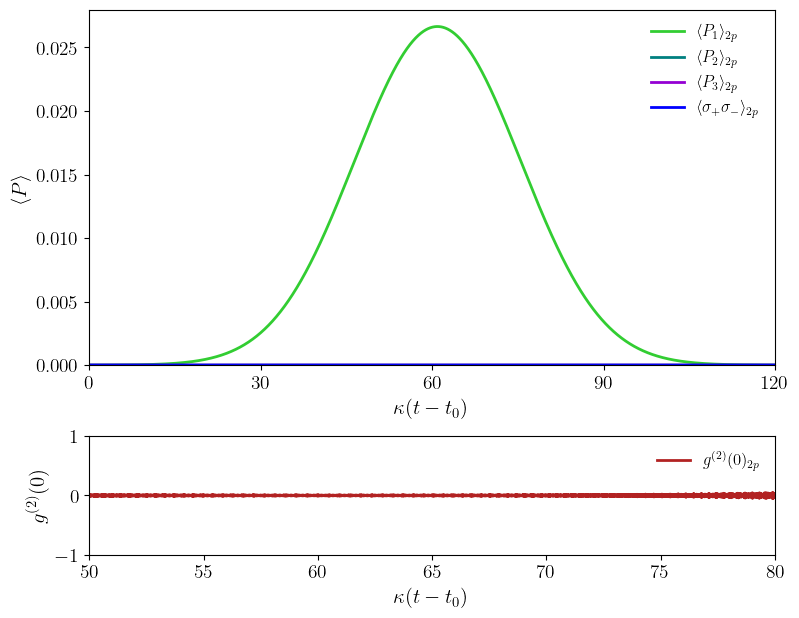

In [7]:
#Plot: compare jc1 and jc2 -> projections, mean number, excited and g20 - pulse
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(2.5*3.54,2.0*3.54),
                                  gridspec_kw={'width_ratios': [10],'height_ratios': [3,1],
                       'wspace': 0.5,
                       'hspace': 0.3},tight_layout=True,sharey=False,sharex=False)

ax1.plot(J1[:,0], J1[:,1],color='limegreen',linestyle='solid',lw=2)
ax1.plot(J1[:,0], J1[:,2],color='teal',linestyle='solid',lw=2)
ax1.plot(J1[:,0], J1[:,3],color='darkviolet',linestyle='solid',lw=2)
ax1.plot(J1[:,0], J1[:,5],color='blue',linestyle='solid',lw=2)
ax1.set_ylabel(r'$\langle P \rangle$')
ax1.set_xlim([0,120.0])
ax1.set_xticks([0,30,60,90,120.0])
ax1.set_ylim([0.0,1.05*max(J1[:,1])])
ax1.legend([r'$\langle P_{1} \rangle_{2p}$',r'$\langle P_{2} \rangle_{2p}$',r'$\langle P_{3} \rangle_{2p}$', r'$\langle \sigma_+ \sigma_- \rangle_{2p}$'],frameon=False,loc=1)
ax1.set_xlabel(r'$\kappa(t-t_0)$')
#ax1.label_outer()

ax2.plot(J1[:,0], J1[:,6],color='firebrick',linestyle='solid',lw=2)
ax2.set_xlabel(r'$\kappa(t-t_0)$')
ax2.set_ylabel(r'$g^{(2)}(0)$')
ax2.set_xlim([50.0,80.0])
ax2.set_ylim([-1.0,1.0])
ax2.set_yticks([-1.0,0,1.0])
ax2.set_xlabel(r'$\kappa(t-t_0)$')
ax2.legend([r'$g^{(2)}(0)_{2p}$'],frameon=False,loc=1)
#ax4.label_outer()

#COLOCAR OUTRAS PROJEÇÕES

fig.savefig('P12_n_ep1_g10_pulse_compare.png', format='png', dpi=600)
plt.show()